## Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve

## Data Preprocessing

In [2]:
df=pd.read_csv(r'C:\Users\ASUS\Downloads\cluster.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
data=df.copy()

In [4]:
data.describe(include='all')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


In [5]:
data.drop('CUST_ID', axis=1, inplace=True)

In [6]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
data['CREDIT_LIMIT']=data['CREDIT_LIMIT'].fillna(value=data['CREDIT_LIMIT'].mean())
data['MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].fillna(value=data['MINIMUM_PAYMENTS'].mean())

In [8]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Modeling with K means

In [9]:
wcss = []

for i in range(1,7):
    kmeans=KMeans(i)
    kmeans.fit(data)
    wcss_iter= kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

In [10]:
wcss

[393060990475.35077,
 279296583114.4998,
 232806170792.95786,
 206554773792.56717,
 182760233760.67422,
 161536421742.96072]

Text(0, 0.5, 'Within Cluster Sum of Squares')

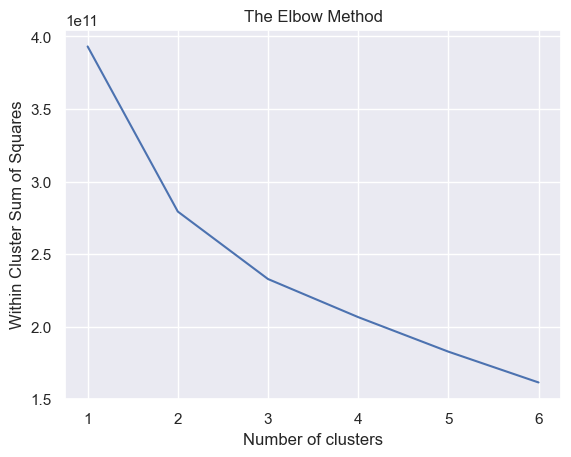

In [11]:
number_clusters = range(1,7)

plt.plot(number_clusters, wcss)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')

In [12]:
kmeans=KMeans(5)
kmeans.fit(data)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [13]:
identified_clusters = kmeans.fit_predict(data)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
identified_clusters

array([0, 2, 2, ..., 0, 0, 0])

In [15]:
data['CLUSTER']=identified_clusters

In [16]:
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


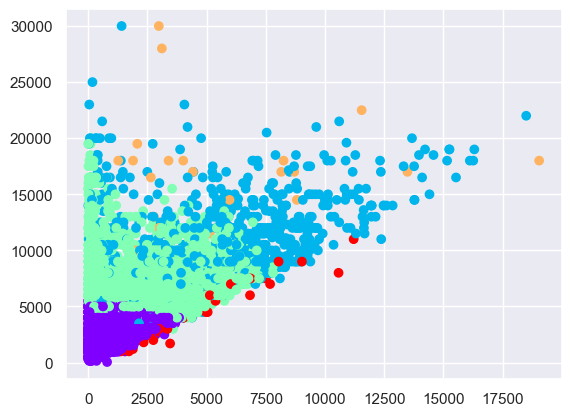

In [17]:
plt.scatter(data['BALANCE'], data['CREDIT_LIMIT'], c=data['CLUSTER'], cmap='rainbow')
plt.show()

## Modeling with AgglomerativeClustering

In [18]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [19]:
data2=df.copy()

In [20]:
data2.drop('CUST_ID', axis=1, inplace=True)

In [21]:
data2['CREDIT_LIMIT']=data2['CREDIT_LIMIT'].fillna(value=data2['CREDIT_LIMIT'].mean())
data2['MINIMUM_PAYMENTS']=data2['MINIMUM_PAYMENTS'].fillna(value=data2['MINIMUM_PAYMENTS'].mean())

In [22]:
data2.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc=StandardScaler()

In [25]:
data_scaled=sc.fit_transform(data2)

In [26]:
data_scaled=pd.DataFrame(data_scaled, columns=data2.columns)
data_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-3.498541e-01,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,4.878305e-17,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-3.354655e-01,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-3.469065e-01,0.329200,-4.122768


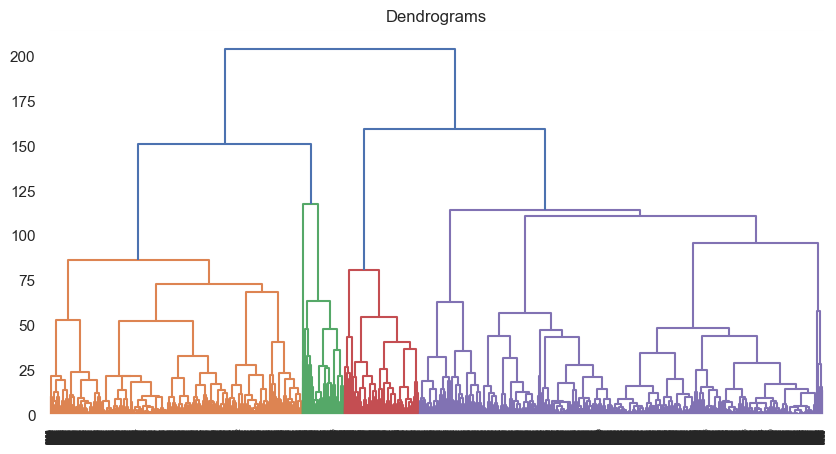

In [27]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 5))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(data_scaled, method='ward'))

In [28]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [29]:
y= cluster.fit_predict(data_scaled)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [30]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

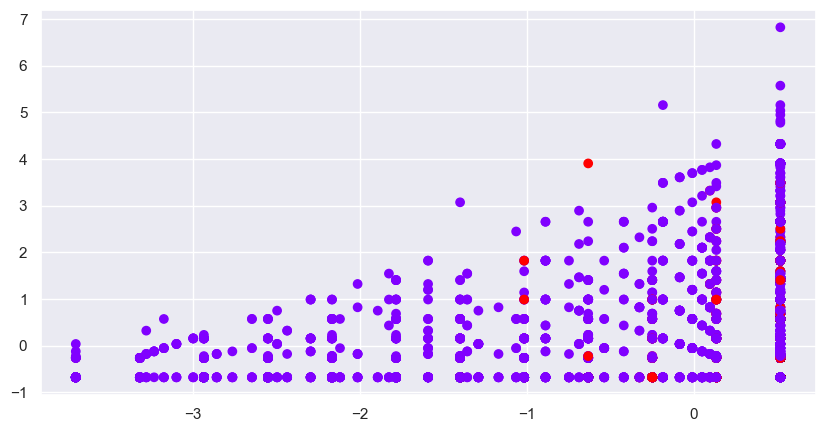

In [31]:
plt.figure(figsize=(10, 5))  
plt.scatter(data_scaled['BALANCE_FREQUENCY'], data_scaled['CASH_ADVANCE_FREQUENCY'], c=cluster.labels_, cmap='rainbow')
plt.show()

In [32]:
data2['CLUSTER'] = y

In [33]:
data2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [34]:
data2.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'CLUSTER'],
      dtype='object')

In [36]:
data2.corr()['CLUSTER']

BALANCE                            -0.053988
BALANCE_FREQUENCY                   0.333177
PURCHASES                           0.401827
ONEOFF_PURCHASES                    0.299053
INSTALLMENTS_PURCHASES              0.400489
CASH_ADVANCE                       -0.208334
PURCHASES_FREQUENCY                 0.761727
ONEOFF_PURCHASES_FREQUENCY          0.513949
PURCHASES_INSTALLMENTS_FREQUENCY    0.630767
CASH_ADVANCE_FREQUENCY             -0.240372
CASH_ADVANCE_TRX                   -0.173297
PURCHASES_TRX                       0.528853
CREDIT_LIMIT                        0.132680
PAYMENTS                            0.127029
MINIMUM_PAYMENTS                   -0.037044
PRC_FULL_PAYMENT                    0.234229
TENURE                              0.258248
CLUSTER                             1.000000
Name: CLUSTER, dtype: float64

In [37]:
avarege_corr = data2.corr()['CLUSTER'].mean()

In [39]:
avarege_corr

0.27272187482517973

In [41]:
dropped_columns = []

for i in data2[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'CLUSTER']]:
    
    
    if abs(data2.corr()['CLUSTER'][i])<avarege_corr:
        dropped_columns.append(i)
    
data2.drop(dropped_columns, axis=1, inplace=True) 

In [42]:
data2.head()

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CLUSTER
0,0.818182,95.40,0.00,95.4,0.166667,0.000000,0.083333,2,0
1,0.909091,0.00,0.00,0.0,0.000000,0.000000,0.000000,0,0
2,1.000000,773.17,773.17,0.0,1.000000,1.000000,0.000000,12,1
3,0.636364,1499.00,1499.00,0.0,0.083333,0.083333,0.000000,1,0
4,1.000000,16.00,16.00,0.0,0.083333,0.083333,0.000000,1,0


In [43]:
data2.columns

Index(['BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'PURCHASES_TRX', 'CLUSTER'],
      dtype='object')

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data2[[
    
    'BALANCE_FREQUENCY', 
#     'PURCHASES', 
    'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES', 
#     'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY', 
    'PURCHASES_INSTALLMENTS_FREQUENCY',
    'PURCHASES_TRX'
                 
                  
]]

vif=pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,2.320993,BALANCE_FREQUENCY
1,1.864507,ONEOFF_PURCHASES
2,2.218998,INSTALLMENTS_PURCHASES
3,2.489976,ONEOFF_PURCHASES_FREQUENCY
4,2.947645,PURCHASES_INSTALLMENTS_FREQUENCY
5,3.948073,PURCHASES_TRX


In [47]:
data2.drop(['PURCHASES', 'PURCHASES_FREQUENCY'], axis=1, inplace=True)

In [48]:
data2

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CLUSTER
0,0.818182,0.00,95.40,0.000000,0.083333,2,0
1,0.909091,0.00,0.00,0.000000,0.000000,0,0
2,1.000000,773.17,0.00,1.000000,0.000000,12,1
3,0.636364,1499.00,0.00,0.083333,0.000000,1,0
4,1.000000,16.00,0.00,0.083333,0.000000,1,0
...,...,...,...,...,...,...,...
8945,1.000000,0.00,291.12,0.000000,0.833333,6,0
8946,1.000000,0.00,300.00,0.000000,0.833333,6,0
8947,0.833333,0.00,144.40,0.000000,0.666667,5,0
8948,0.833333,0.00,0.00,0.000000,0.000000,0,0


In [49]:
data2.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'PURCHASES_TRX', 'CLUSTER'],
      dtype='object')

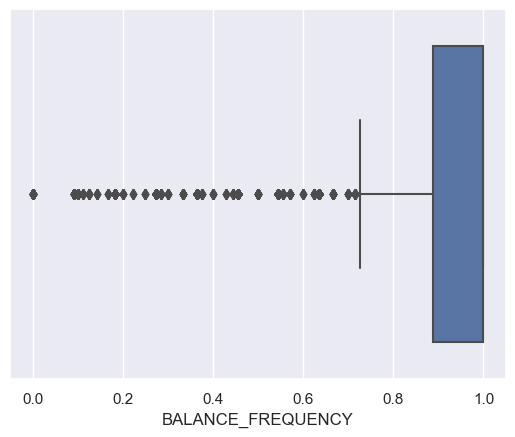

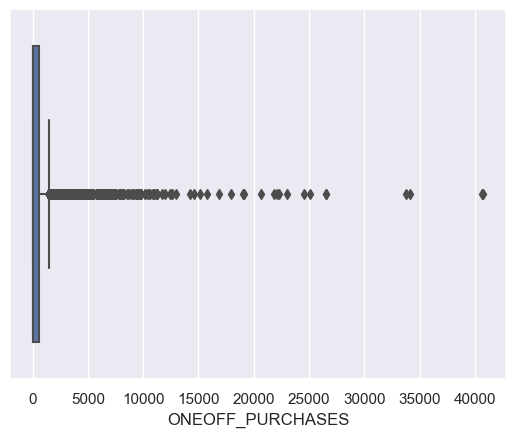

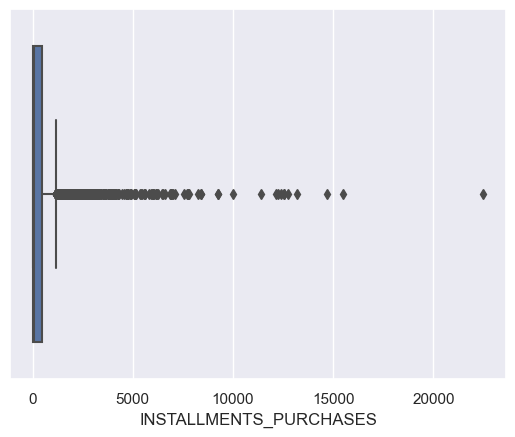

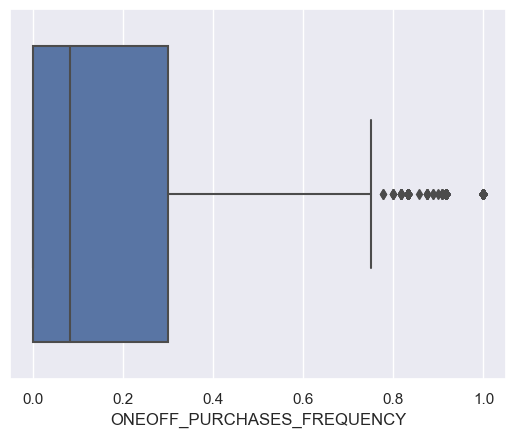

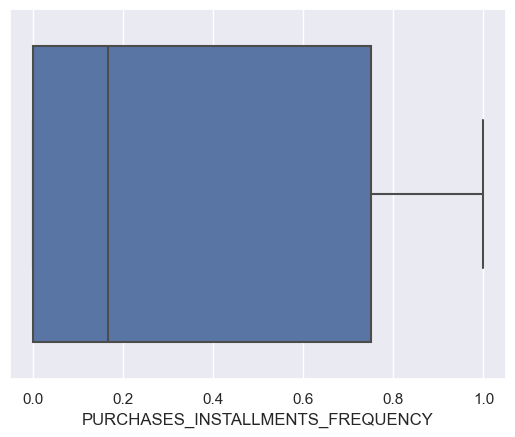

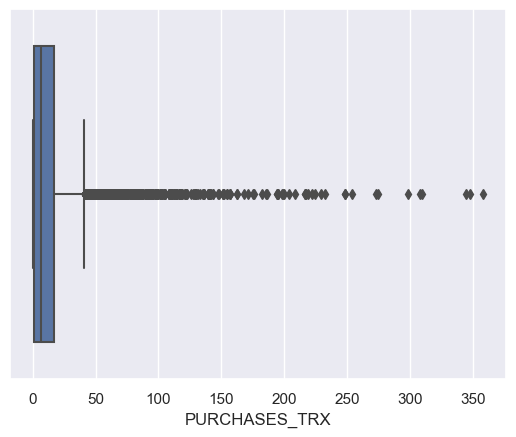

In [50]:
for i in data2[['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'PURCHASES_TRX']]:
    
    sns.boxplot(x=data2[i], data=data2)
    plt.show()

In [51]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
Lower=q1-1.5*IQR
Upper=q3+1.5*IQR

In [52]:
for i in data2[['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'PURCHASES_TRX']]:
    
    data2[i] = np.where(data2[i] > Upper[i], Upper[i],data2[i])
    data2[i] = np.where(data2[i] < Lower[i], Lower[i],data2[i])

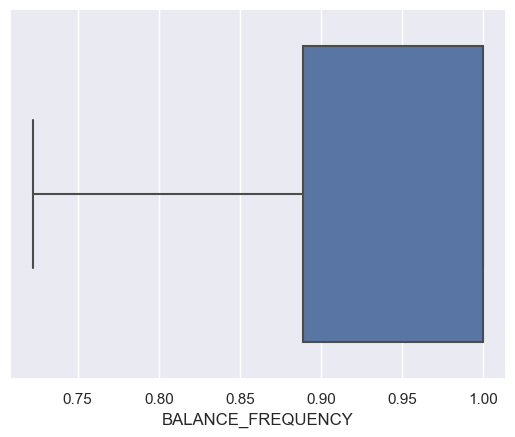

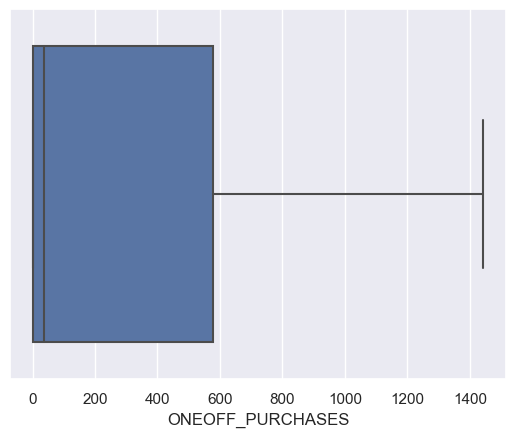

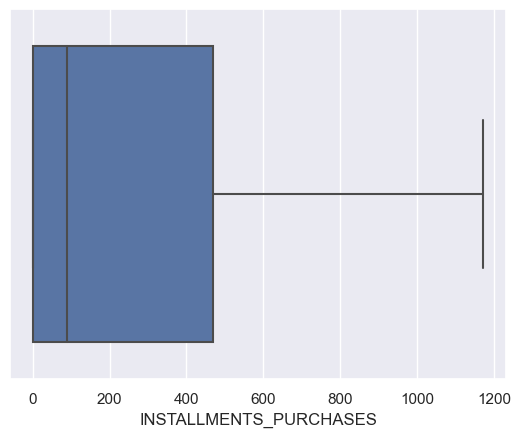

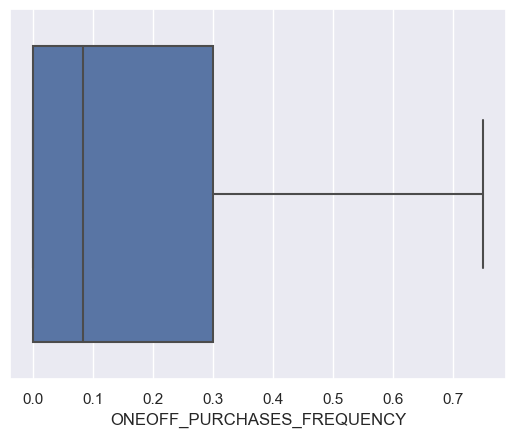

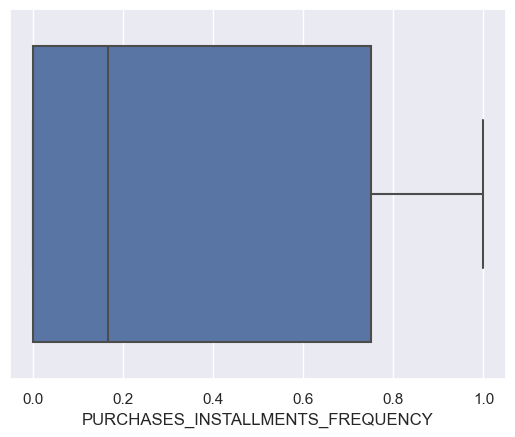

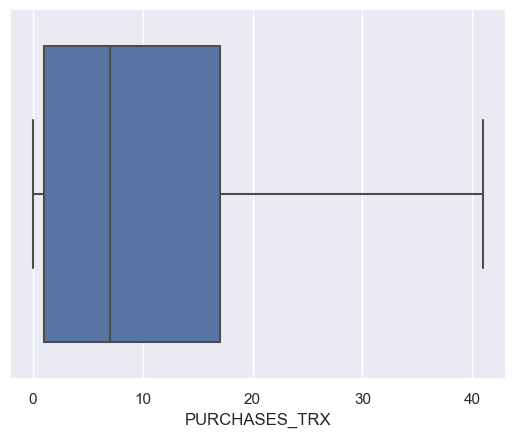

In [53]:
for i in data2[['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'PURCHASES_TRX']]:
    
    sns.boxplot(x=data2[i], data=data2)
    plt.show()

In [54]:
data2=data2.reset_index(drop=True)

## Applying Supervised ML using Agglomerative Clustering

In [55]:
X=data2.drop('CLUSTER',axis=1)
y=data2['CLUSTER']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
def evaluate(model, X_test, y_test):
    
    y_pred_test = model.predict(X_test)
    y_prob_test = model.predict_proba(X_test)[:,1]
    
    roc_score_test = roc_auc_score(y_test, y_prob_test)
    gini_score_test= roc_score_test*2-1
    
    y_pred_train = model.predict(X_train)
    y_prob_train = model.predict_proba(X_train)[:,1]
    
    roc_score_train = roc_auc_score(y_train, y_prob_train)
    gini_score_train = roc_score_train*2-1
    
    confusion_matrix=metrics.confusion_matrix(y_test, y_pred_test)
    report=classification_report(y_test, y_pred_test)
    
    print('Model Performance')

    print('Gini Score for Test:', gini_score_test*100)
    
    print('Gini Score for Train:', gini_score_train*100)
    
    print('Confusion Matrix', confusion_matrix)
    
    print('Classification report', report)

In [58]:
from xgboost import XGBClassifier

In [59]:
xgboost=XGBClassifier()

In [60]:
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
result=evaluate(xgboost, X_test, y_test)

Model Performance
Gini Score for Test: 94.3673614599029
Gini Score for Train: 99.46230223253842
Confusion Matrix [[1017   69]
 [  75  629]]
Classification report               precision    recall  f1-score   support

           0       0.93      0.94      0.93      1086
           1       0.90      0.89      0.90       704

    accuracy                           0.92      1790
   macro avg       0.92      0.91      0.92      1790
weighted avg       0.92      0.92      0.92      1790



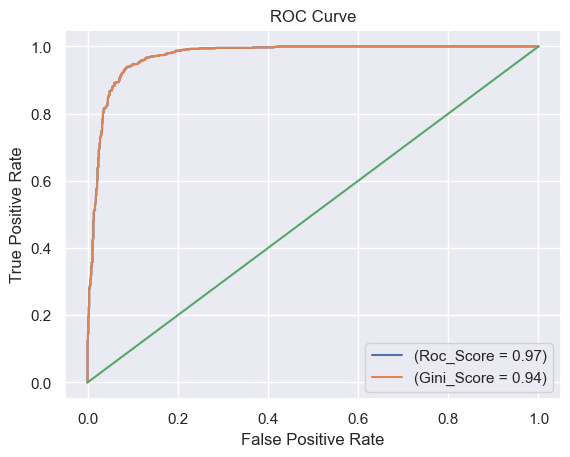

In [62]:
y_prob = xgboost.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

## Univariate Analysis

In [64]:
variables= []
train_Gini=[]
test_Gini=[]

for i in X_train.columns:
    X_train_single=X_train[[i]]
    X_test_single=X_test[[i]]
    
    xgboost.fit(X_train_single, y_train)
    y_prob_train_single=xgboost.predict_proba(X_train_single)[:, 1]
    
    
    roc_prob_train=roc_auc_score(y_train, y_prob_train_single)
    gini_prob_train=2*roc_prob_train-1
    
    
    xgboost.fit(X_test_single, y_test)
    y_prob_test_single=xgboost.predict_proba(X_test_single)[:, 1]
    
    
    roc_prob_test=roc_auc_score(y_test, y_prob_test_single)
    gini_prob_test=2*roc_prob_test-1
    
    
    variables.append(i)
    train_Gini.append(gini_prob_train)
    test_Gini.append(gini_prob_test)
    

df = pd.DataFrame({'Variable': variables, 'Train Gini': train_Gini, 'Test Gini': test_Gini})

df= df.sort_values(by='Test Gini', ascending=False)

df   

,Variable,Train Gini,Test Gini
5,PURCHASES_TRX,0.897398,0.899153
2,INSTALLMENTS_PURCHASES,0.700340,0.731136
4,PURCHASES_INSTALLMENTS_FREQUENCY,0.739520,0.716699
1,ONEOFF_PURCHASES,0.504047,0.607490
3,ONEOFF_PURCHASES_FREQUENCY,0.534447,0.558567
0,BALANCE_FREQUENCY,0.333380,0.344332
